In [196]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

Input the 2D data map

In [197]:
num = 0
count = 0 
fname = "inputFile2D.txt"
with open(fname, 'r') as f:
    num = f.readline()

matrixInput = np.zeros((int(num),int(num)))

with open(fname, 'r') as file:
    next(file)
    for i in range(int(num)):
        data = file.readline()
        matrixInput[i, :] = data.split('\t')
print('Input:')
print(matrixInput)


Input:
[[  1.   2.   3.   4.]
 [  5.   6.   7.   8.]
 [  9.  10.  11.  12.]
 [ 13.  14.  15.  16.]]


Calculate wavenumbers in both spatial directions

In [246]:
M = int(num)
N = int(num)

kx = int(M/2)
ky = int(N/2)

dx = 1
dy = 1

m = np.linspace(-kx+1, kx, (2*kx))
n = np.linspace(-ky+1, ky, (2*ky))


wx = m*2*np.pi/(M*dx)
wy = n*2*np.pi/(N*dy)

print('wx:')
print(wx)
print('wy:')
print(wy)

wx:
[-1.57079633  0.          1.57079633  3.14159265]
wy:
[-1.57079633  0.          1.57079633  3.14159265]


Fold the array in 2D

MAP:

In [247]:
"""shift = int(M/2+1)
def foldonce1D(A, n):
    wshift = np.zeros((len(A),1))
    wshiftshift = np.zeros((len(A),1))
    shift = 1
    for i in range(n):
        temp = A[0]
        if j == n-1:
            wshift[i] = temp
        else:
            wshift[i] = A[i+shift-1]
    return(wshift)

for i in range(shift):
    wxshift = foldonce1D(wx, len(wx))
    wyshift = foldonce1D(wy, len(wy))
    wx = wxshift
    wy = wyshift

print(wxshift)
print(wyshift)"""

'shift = int(M/2+1)\ndef foldonce1D(A, n):\n    wshift = np.zeros((len(A),1))\n    wshiftshift = np.zeros((len(A),1))\n    shift = 1\n    for i in range(n):\n        temp = A[0]\n        if j == n-1:\n            wshift[i] = temp\n        else:\n            wshift[i] = A[i+shift-1]\n    return(wshift)\n\nfor i in range(shift):\n    wxshift = foldonce1D(wx, len(wx))\n    wyshift = foldonce1D(wy, len(wy))\n    wx = wxshift\n    wy = wyshift\n\nprint(wxshift)\nprint(wyshift)'

INPUT:

In [200]:
""""n = int(num)
A = matrixInput
s = M/2 + 1


Ashift = np.zeros((n,n))
Ashiftshift = np.zeros((n,n))
shift = 1
for i in range(n):
    temp = A[i,0]
    for j in range(n):
        if j == n-1:
            Ashift[i,n-1] = temp
        else:
            Ashift[i,j] = A[i, j+shift]


for i in range(n):
    temprow = Ashift[0,:]
    if i == n-1:
        Ashiftshift[n-1,:] = temprow
    else:
        Ashiftshift[i,:] = Ashift[i+shift,:]

print(Ashiftshift)"""


'"n = int(num)\nA = matrixInput\ns = M/2 + 1\n\n\nAshift = np.zeros((n,n))\nAshiftshift = np.zeros((n,n))\nshift = 1\nfor i in range(n):\n    temp = A[i,0]\n    for j in range(n):\n        if j == n-1:\n            Ashift[i,n-1] = temp\n        else:\n            Ashift[i,j] = A[i, j+shift]\n\n\nfor i in range(n):\n    temprow = Ashift[0,:]\n    if i == n-1:\n        Ashiftshift[n-1,:] = temprow\n    else:\n        Ashiftshift[i,:] = Ashift[i+shift,:]\n\nprint(Ashiftshift)'

In [248]:
n = int(num)
A = matrixInput
s = (M/2) + 1

def foldonce2D(A, n):
    Ashift = np.zeros((n,n))
    Ashiftshift = np.zeros((n,n))
    shift = 1
    for i in range(n):
        temp = A[i,0]

        for j in range(n):
            if j == n-1:
                Ashift[i,n-1] = temp
            else:
                Ashift[i,j] = A[i, j+shift]

    for i in range(n):
        temprow = Ashift[0,:]
        if i == n-1:
            Ashiftshift[n-1,:] = temprow
        else:
            Ashiftshift[i,:] = Ashift[i+shift,:]
    return Ashiftshift

for i in range(int(s-1)):
    folded = foldonce2D(A, n)
    A = folded
print(folded)


[[ 11.  12.   9.  10.]
 [ 15.  16.  13.  14.]
 [  3.   4.   1.   2.]
 [  7.   8.   5.   6.]]


Apply FFT routine to obtain the FFT of the folded data

In [249]:
fft = np.fft.fft2(folded)
print(fft)

[[ 136. +0.j    8. -8.j   -8. +0.j    8. +8.j]
 [  32.-32.j    0. +0.j    0. +0.j    0. +0.j]
 [ -32. +0.j    0. +0.j    0. +0.j    0. +0.j]
 [  32.+32.j    0. +0.j    0. +0.j    0. +0.j]]


unfold the fourier transform

In [250]:
B = fft.imag
C = fft.real

def unfold2Donce(A, n):
    Ashift = np.zeros((n,n))
    Ashiftshift = np.zeros((n,n))
    shift = 1
    for i in range(n):
        temp = A[i,n-1]
        for j in range(n):
            if j == 0:
                Ashift[i,0] = temp
            else:
                Ashift[i,j] = A[i, j-shift]
   # print(Ashift)
    for i in range(n):
        temprow = Ashift[n-1,:]

        if i == 0:
            Ashiftshift[0,:] = temprow
        else:
            Ashiftshift[i,:] = Ashift[i-shift,:]
    #print(Ashiftshift)
    return Ashiftshift


for i in range(int(s-1)):
    ufftR = unfold2Donce(C, n)
    ufftI = unfold2Donce(B,n)
    test = unfold2Donce(A,n)
    C = ufftR
    B = ufftI
    A = test


print(test)

[[  1.   2.   3.   4.]
 [  5.   6.   7.   8.]
 [  9.  10.  11.  12.]
 [ 13.  14.  15.  16.]]


Plot the real and imaginary parts seperately, and plot the power spectrum as functions of wavenumbers x and y directions. 

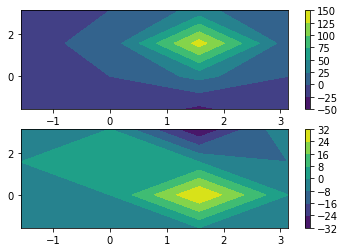

In [251]:
wxm, wym = np.meshgrid(wx,wy)


plt.subplot(211)
plt.plot(figsize=((15,1)))
plt.contourf(wxm, wym, ufftR)
plt.colorbar()
plt.subplot(212)
plt.plot(figsize=((15,1)))
plt.contourf(wxm, wym, ufftI)
plt.colorbar()
plt.show()

Apply the code to three componenets of gravity gradient data from lab 02, observe and descrive the two components and the corresponding power spectra


INPUT DATA

In [275]:
#########Reading header###########
num = 0
count = 0 
store = 's'
number = ' '
with open('fileOutTaskIII.txt', 'r') as f:
    dat = f.readline()
    for i in dat:
        if (i == '#'):
            store = i
        else:
            number += i
num = int(number)
split = int(num)

numT= 0
countT= 0 
storeT= 's'
numberT = ' '
with open('fileOutTaskIII.txt', 'r') as file:
    dat = file.readline()
    for i in dat:
        if (i == '#'):
            storeT = i
        else:
            numberT += i
numT = int(numberT)
splitT = int(np.sqrt(numT))

#########Declare arrays#############
xi = np.zeros(split)
yi = np.zeros(split)
Txxi = np.zeros((split,split))
Txyi = np.zeros((split,split))
Tzzi = np.zeros((split,split))



################store to array##############
matrixInput = np.zeros((int(num)*int(num), 9))
with open('fileOutTaskIII.txt', 'r') as file:
    next(file)
    for i in range(int(num)*int(num)):
        data = file.readline()
        matrixInput[i, :] =data.split('\t')
    
    
Xinp = matrixInput[:,0]
Yinp = matrixInput[:,1]
Txx = matrixInput[:,3]
Txy = matrixInput[:,4]
Tzz = matrixInput[:,8]

count = 0

for i in range((int(num))):
    xi[i] = Xinp[count]
    for j in range((int(num))):
        yi[j] = Yinp[count]
        Txxi[i,j] = Txx[count]
        Txyi[i,j] = Txy[count]
        Tzzi[i,j] = Tzz[count]

print(np.shape(Tzzi))



(63, 63)
63


CALCULATE WAVENUMBER

In [299]:
M = int(num)
N = int(num)

kx = int(M/2)
ky = int(N/2)

dx = 1
dy = 1

m = np.linspace(-kx+1, kx, (M))
n = np.linspace(-ky+1, ky, (N))


wx = m*2*np.pi/(M*dx)
wy = n*2*np.pi/(N*dy)

print('wx:')
print(wx)
print('wy:')
print(wy)

wx:
[-2.991993   -2.8938685  -2.795744   -2.6976195  -2.599495   -2.50137049
 -2.40324599 -2.30512149 -2.20699699 -2.10887249 -2.01074799 -1.91262348
 -1.81449898 -1.71637448 -1.61824998 -1.52012548 -1.42200098 -1.32387647
 -1.22575197 -1.12762747 -1.02950297 -0.93137847 -0.83325397 -0.73512946
 -0.63700496 -0.53888046 -0.44075596 -0.34263146 -0.24450696 -0.14638245
 -0.04825795  0.04986655  0.14799105  0.24611555  0.34424006  0.44236456
  0.54048906  0.63861356  0.73673806  0.83486256  0.93298707  1.03111157
  1.12923607  1.22736057  1.32548507  1.42360957  1.52173408  1.61985858
  1.71798308  1.81610758  1.91423208  2.01235658  2.11048109  2.20860559
  2.30673009  2.40485459  2.50297909  2.60110359  2.6992281   2.7973526
  2.8954771   2.9936016   3.0917261 ]
wy:
[-2.991993   -2.8938685  -2.795744   -2.6976195  -2.599495   -2.50137049
 -2.40324599 -2.30512149 -2.20699699 -2.10887249 -2.01074799 -1.91262348
 -1.81449898 -1.71637448 -1.61824998 -1.52012548 -1.42200098 -1.32387647
 -1.22

FOLD IT

In [283]:
n = int(num)
A = Txxi
s = (M/2) + 1


for i in range(int(s-1)):
    folded = foldonce2D(A, n)
    A = folded


(63, 63)


APPLY FFT

In [285]:
fft = np.fft.fft2(folded)


UNFOLD

In [288]:
B = fft.imag
C = fft.real
for i in range(int(s-1)):
    ufftR = unfold2Donce(C, n)
    ufftI = unfold2Donce(B,n)
    test = unfold2Donce(A,n)
    C = ufftR
    B = ufftI
    A = test




PLOT

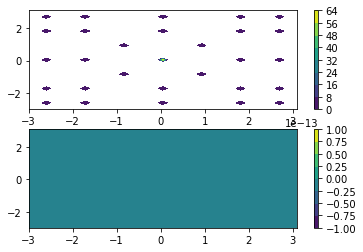

In [301]:
wxm, wym = np.meshgrid(wx,wy)


plt.subplot(211)
plt.plot(figsize=((15,1)))
plt.contourf(wxm, wym, ufftR)
plt.colorbar()
plt.subplot(212)
plt.plot(figsize=((15,1)))
plt.contourf(wxm, wym, ufftI)
plt.colorbar()


plt.show()